In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [104]:
f = pd.read_csv('1.csv')

In [105]:
f

,Unnamed: 0,Unnamed: 0.1,PRN,Epoch_Time_of_Clock,SV_Clock_Bias,SV_Clock_Drift,SV_Clock_Drift_Rate,IODE,Crs,Del_n,...,I_dot,Codes,GPS_week,L2_P_Data_flag,SV_accuracy,SV_health,Tgd,IODC,T_Tx,Fit_Interval
0,0,80,1,2017-11-01 14:00:00,-0.000008,-2.387424e-12,0,30,20.71875,4.874846e-09,...,2.239379e-10,1,1973,0,0,0,5.587935e-09,30,302466,0
1,1,88,1,2017-11-01 16:00:00,-0.000008,-2.387424e-12,0,31,16.81250,4.916991e-09,...,3.046555e-10,1,1973,0,0,0,5.587935e-09,31,309606,0
2,2,101,1,2017-11-01 18:00:00,-0.000008,-2.387424e-12,0,32,13.84375,4.874846e-09,...,2.971552e-10,1,1973,0,0,0,5.587935e-09,32,316806,0
3,3,109,1,2017-11-01 20:00:00,-0.000008,-2.387424e-12,0,33,12.28125,4.875203e-09,...,2.582250e-10,1,1973,0,0,0,5.587935e-09,33,324006,0
4,4,124,1,2017-11-01 22:00:00,-0.000008,-2.387424e-12,0,34,23.03125,4.753055e-09,...,2.000083e-10,1,1973,0,0,0,5.587935e-09,34,331206,0
5,5,135,1,2017-11-02 00:00:00,-0.000008,-2.387424e-12,0,69,29.00000,4.741626e-09,...,2.546535e-10,1,1973,0,1,0,5.587935e-09,69,338406,0
6,6,218,1,2017-11-02 12:00:00,-0.000008,-2.387424e-12,0,73,40.03125,4.919491e-09,...,3.482288e-10,1,1973,0,0,0,5.587935e-09,73,387756,0
7,7,221,1,2017-11-02 14:00:00,-0.000008,-2.387424e-12,0,74,46.56250,4.851988e-09,...,4.164459e-10,1,1973,0,0,0,5.587935e-09,74,388806,0
8,8,233,1,2017-11-02 16:00:00,-0.000008,-2.387424e-12,0,75,43.84375,4.890561e-09,...,5.128785e-10,1,1973,0,0,0,5.587935e-09,75,396006,0
9,9,244,1,2017-11-02 18:00:00,-0.000008,-2.387424e-12,0,76,41.75000,4.866274e-09,...,4.968064e-10,1,1973,0,0,0,5.587935e-09,76,403206,0


In [106]:
df1 = pd.to_datetime(f['Epoch_Time_of_Clock'])

f['Epoch_Time_of_Clock']=df1
f.Timestamp = pd.to_datetime(f['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S') 
x = f['Epoch_Time_of_Clock']

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [107]:
y = f['sqrt_A']

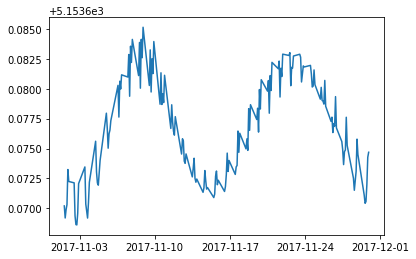

In [108]:
plt.plot(x,y)

In [109]:
#create 2 matix for dependent and independent values
#create 2 matix for dependent and independent values
X = f.iloc[:,3:4].values
y = f.iloc[:,14]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [110]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:4642.01	validation_1-rmse:4642.01
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4181.56	validation_1-rmse:4181.56
[2]	validation_0-rmse:3766.77	validation_1-rmse:3766.77
[3]	validation_0-rmse:3393.13	validation_1-rmse:3393.13
[4]	validation_0-rmse:3056.56	validation_1-rmse:3056.56
[5]	validation_0-rmse:2753.37	validation_1-rmse:2753.37
[6]	validation_0-rmse:2480.25	validation_1-rmse:2480.25
[7]	validation_0-rmse:2234.23	validation_1-rmse:2234.22
[8]	validation_0-rmse:2012.6	validation_1-rmse:2012.6
[9]	validation_0-rmse:1812.97	validation_1-rmse:1812.97
[10]	validation_0-rmse:1633.13	validation_1-rmse:1633.13
[11]	validation_0-rmse:1471.14	validation_1-rmse:1471.14
[12]	validation_0-rmse:1325.21	validation_1-rmse:1325.21
[13]	validation_0-rmse:1193.76	validation_1-rmse:1193.76
[14]	validation_0-rmse:1075.34	validation_1-rmse:1075.3

[140]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[141]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[142]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[143]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[144]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[145]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[146]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[147]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[148]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[149]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[150]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[151]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[152]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[153]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[154]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[155]	validation_0-rmse:0.002715	validation_1-rmse:0.003104
[156]	validation_0-rmse:0.002715	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [112]:
y_preditctor = reg.predict(X_test)

In [113]:
y_preditctor

array([5153.6772, 5153.6714, 5153.676 , 5153.6787, 5153.678 , 5153.6685,
       5153.678 , 5153.673 , 5153.678 , 5153.6714, 5153.6777, 5153.674 ,
       5153.678 , 5153.671 , 5153.6685, 5153.674 , 5153.671 , 5153.6704,
       5153.675 , 5153.6787, 5153.671 , 5153.6685, 5153.6714, 5153.675 ,
       5153.674 , 5153.676 , 5153.6787, 5153.676 , 5153.678 , 5153.6685,
       5153.6714, 5153.6714, 5153.6714, 5153.678 , 5153.671 , 5153.671 ,
       5153.6724, 5153.6714, 5153.6787, 5153.678 , 5153.671 , 5153.671 ,
       5153.671 , 5153.6777, 5153.6714, 5153.678 , 5153.678 , 5153.6685,
       5153.6772, 5153.674 , 5153.6714, 5153.6777, 5153.6714, 5153.6724],
      dtype=float32)

In [119]:
#plt.scatter(X_train, y_train)
#
#plt.plot(X_train, reg.predict(X_train))